# Initial Exploration and Analysis of 2016-2017 Restaurant Reviews Data in Canada

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

In [3]:
df = pd.read_csv('2016-2017_canada_restaurant_reviews.csv')

In [4]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2016-07-25,0,0tFxHz2j1GJ8-IYPp5NxWA,4,came lunch last week pleasant surpri fresh tas...,0,t4cYW73lVcBb-1R_Wms1RQ
1,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,1,2016-12-06,0,KByp3bKAt9GMqU7koJ8htg,5,want mexican reason price citi gotta quesadill...,0,hqk4eugYhjmhM-3S2FwGjA
2,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2017-12-12,0,e1HiHHD7CzY5NKZG7hvhTw,5,absolut delici great servic well glad forgot l...,0,Sew1Nht6Q0sGTIZeNvRfLw
3,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,0,2017-08-09,0,oKm8UTv-QSC0oCbniqwxjg,4,tasti authent mexican street food give appropr...,0,NoQCmYKyMPs4D01Wa6dZew
4,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,1,2016-07-16,0,-i9u19L08A4VvhFVfqXK9Q,5,first time sinc chang ownership burrito beer l...,0,qUnvyCfCpr9ZG_F5oezJMw


### 1. What are the top 50 restaurants with most reviews in Canada between 2016-2017 ?

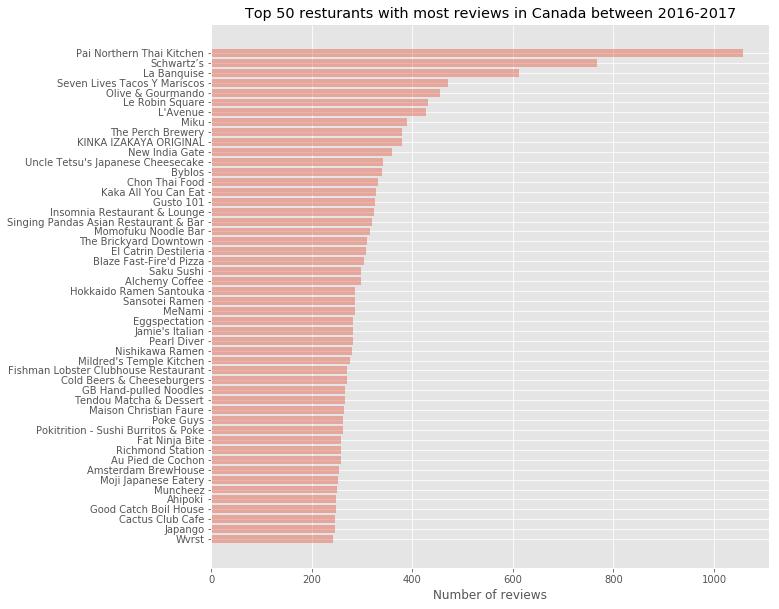

In [5]:
business_id = list(df.groupby(['business_id'])['review_id'].count().index)
resturant_name = [pd.unique(df[df['business_id'] == res]['name'])[0] for res in business_id]
popularity = list(df.groupby(['business_id'])['review_id'].count())
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]] # 存储前50名饭店名，argsort返回从小到大的索引
y_pos = np.arange(len(objects)) # tick的位置
plt.barh(y_pos, np.sort(popularity)[::-1][:50], align='center', alpha = 0.4) # 位置，柱宽度。。。
plt.yticks(y_pos, objects) # 位置loc，标记label
plt.xlabel('Number of reviews')
plt.title('Top 50 resturants with most reviews in Canada between 2016-2017')
plt.gca().invert_yaxis() # gca(**kwargs)获得当前符合参数条件的axes的实例，invert_yaxis反转y轴

### 2. Whether the more reviews means the better quality ?

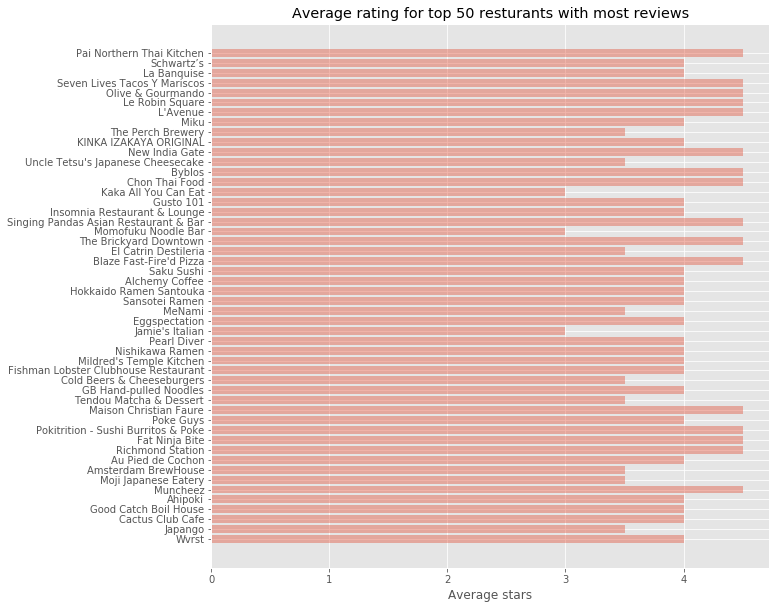

In [6]:
avg_starts = df.groupby(['business_id'])['avg_stars'].mean()
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, [avg_starts[i] for i in np.argsort(popularity)[::-1][:50]], align='center', alpha = 0.4)
plt.yticks(y_pos, objects)
plt.xlabel('Average stars')
plt.title('Average rating for top 50 resturants with most reviews')
plt.gca().invert_yaxis()

In [7]:
print('The average rate for all resturants in Canada is %f.' \
     %(np.mean(avg_starts)))
print('The proportion of top 50 resturants with rate less than 4 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 4.0)/50.0))
print('The proportion of top 50 resturants with rate less than 3.5 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 3.5)/50.0))

The average rate for all resturants in Canada is 3.498051.
The proportion of top 50 resturants with rate less than 4 is 0.240000.
The proportion of top 50 resturants with rate less than 3.5 is 0.060000.


**Check how strong the number of reviews and the average rating are related?**

In [8]:
# Pearson product-moment correlation coefficient皮尔逊积矩相关系数,(-1,1),度量变量之间的线性相关程度
from scipy.stats.stats import pearsonr 
print('The correlation coefficient between number of reviews and average rating is %f.' \
      % (pearsonr(np.array(popularity), avg_starts)[0]))

The correlation coefficient between number of reviews and average rating is 0.144893.


**Conclusion: 0.13676 is quite close to 0, which means the relationship between number of reviews and average rating is poor**

**说明“评论数量”与“平均得分”之间的相关性很弱**

### 3. What are the popular restaurant styles in Canada between 2015 and 2018 ?

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = df['categories']
X = vectorizer.fit_transform(corpus) 
X = np.sum(X, axis=0)
X = np.array(X)[0]
cate_label = vectorizer.get_feature_names()

**Pick out top 30 labels**

In [10]:
top_30_label = [cate_label[i] for i in np.argsort(X)[::-1][1:31]]
top_30_percentage = [X[i]/sum(X) for i in np.argsort(X)[::-1][1:31]]
print('%48s %25s' % ('Label name', 'Percentage of all labels'))
for i in range(30):
    print('%24s %24s %24f' % \
          (str(i+1), top_30_label[i], top_30_percentage[i]))

                                      Label name  Percentage of all labels
                       1                     food                 0.072510
                       2                     bars                 0.062682
                       3                nightlife                 0.031707
                       4                      new                 0.024917
                       5                 american                 0.021467
                       6                breakfast                 0.020783
                       7                   brunch                 0.020777
                       8                 japanese                 0.019903
                       9                 canadian                 0.017809
                      10                  chinese                 0.017374
                      11                      tea                 0.013130
                      12               sandwiches                 0.013123
                      13 

**Pick out Labels which can represent food style:**

|index|Food Style|Percentage|
|-----|----------|----------|
|1|american|0.021467|
|2|japanese|0.019903|
|3|canadian|0.017809|
|4|chinese|0.017374|
|5|italian|0.012488|
|6|asian|0.012010|
|7|mexican|0.009037|
|8|french|0.007547|
|9|korean|0.007091|